# Spectrogram




In [ ]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
! pip install pydub

In [ ]:
from pydub import AudioSegment
from IPython.display import Audio
import soundfile as sf

In [ ]:
! pip install pysoundfile

## Musik Spectrogram

In [ ]:
 audio_file1 = 'Prelude No. 2.wav'

In [ ]:
ipd.Audio(audio_file1)

In [ ]:
x, sr = librosa.load(audio_file1)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize = (10, 5))
librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
plt.colorbar()

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

fig = plt.Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
fig.savefig('Classic1.png')

#Metode CNN dan CRNN

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import numpy as np

In [ ]:
base_dir = '/content/gdrive/My Drive/CNN/Lima Genre 50/'
!ls  "/content/gdrive/My Drive/CNN/Lima Genre 50/"

Classic  Folk  Jazz  Pop  Soul	Test  Train


In [ ]:
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Test')

In [ ]:
classic_dir = os.path.join(base_dir, 'Classic/')
folk_dir = os.path.join(base_dir, 'Folk/')
jazz_dir = os.path.join(base_dir, 'Jazz/')
pop_dir = os.path.join(base_dir, 'Pop/')
soul_dir = os.path.join(base_dir, 'Soul/')

print("Jumlah Data tiap Genre")
print('Jumlah Musik Classic : ', len(os.listdir(classic_dir)))
print('Jumlah Musik Folk : ', len(os.listdir(folk_dir)))
print('Jumlah Musik Jazz : ', len(os.listdir(jazz_dir)))
print('Jumlah Musik Pop : ', len(os.listdir(pop_dir)))
print('Jumlah Musik Soul : ', len(os.listdir(soul_dir)))

Jumlah Data tiap Genre
Jumlah Musik Classic :  10
Jumlah Musik Folk :  10
Jumlah Musik Jazz :  10
Jumlah Musik Pop :  10
Jumlah Musik Soul :  10


In [ ]:
train_classic = os.path.join(train_dir, 'classic/')
train_folk = os.path.join(train_dir, 'folk/')
train_jazz = os.path.join(train_dir, 'jazz/')
train_pop = os.path.join(train_dir, 'pop/')
train_soul = os.path.join(train_dir, 'soul/')

In [ ]:
validation_classic = os.path.join(validation_dir, 'classic/')
validation_folk = os.path.join(validation_dir, 'folk/')
validation_jazz = os.path.join(validation_dir, 'jazz/')
validation_pop = os.path.join(validation_dir, 'pop/')
validation_soul = os.path.join(validation_dir, 'soul/')

Dataset

In [ ]:
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source +  i
    destination = val + i
    copyfile(i_file, destination)

#jumlah pembagian data training dan testing
train_ratio = 0.9

#pembagian training dan testing
#classic
source_00 = classic_dir
train_00 = train_classic
val_00 = validation_classic
train_val_split(source_00, train_00, val_00, train_ratio)

#pop
source_01 = pop_dir
train_01 = train_pop
val_01 = validation_pop
train_val_split(source_01, train_01, val_01, train_ratio)

#Jazz
source_02 = jazz_dir
train_02 = train_jazz
val_02 = validation_jazz
train_val_split(source_02, train_02, val_02, train_ratio)

#soul
source_03 = soul_dir
train_03 = train_soul
val_03 = validation_soul
train_val_split(source_03, train_03, val_03, train_ratio)

#folk
source_04 = folk_dir
train_04 = train_folk
val_04 = validation_folk
train_val_split(source_04, train_04, val_04, train_ratio)

In [ ]:
print('Jumlah Seluruh Data per Genre  :', len(os.listdir(classic_dir)))
print('Jumlah Train Data per Genre 	:', len(os.listdir(train_classic)))
print('Jumlah Test Data pre Genre     :', len(os.listdir(validation_classic)))

Jumlah Seluruh Data per Genre  : 10
Jumlah Train Data per Genre 	: 9
Jumlah Test Data pre Genre     : 1


Pre processing

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'categorical'
)

Found 45 images belonging to 5 classes.
Found 5 images belonging to 5 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
   if(logs.get('accuracy') > 1):
    print('\nAkurasi mencapai 100%')
    self.model.stop_training = True

callbacks = myCallback()

Model CNN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dropout(0.3,seed=112),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dropout(0.5,seed=112),
    tf.keras.layers.Dense(5, activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

Model CNN-GRU

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Conv2D, Dense, MaxPooling1D, Flatten, MaxPool2D
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,GRU
from tensorflow.keras.models import Sequential

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
  tf.keras.layers.Lambda(lambda x: x[:,:,:,0], input_shape=(150, 150, 3)),
  tf.keras.layers.GRU(60, activation="tanh", return_sequences=True),
  tf.keras.layers.GRU(60, activation="tanh", return_sequences=False),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(5, activation = 'sigmoid')
  ])

In [ ]:
model.summary()

Model Compile & Model Fit

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam', 
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
     train_generator,
     steps_per_epoch = 9, # 45 gambar = batch * steps
     epochs = 50,
     validation_data = val_generator,
     validation_steps = 1, # 5 gambar = batch * steps
     verbose = 1,
     callbacks = [callbacks]
)

Epoch 1/50
9/9 [==============================] - 3s 262ms/step - loss: 1.5979 - accuracy: 0.2000 - val_loss: 1.6121 - val_accuracy: 0.2000
Epoch 2/50
9/9 [==============================] - 2s 223ms/step - loss: 1.5231 - accuracy: 0.2222 - val_loss: 1.6122 - val_accuracy: 0.2000
Epoch 3/50
9/9 [==============================] - 2s 180ms/step - loss: 1.5615 - accuracy: 0.2667 - val_loss: 1.6117 - val_accuracy: 0.2000
Epoch 4/50
9/9 [==============================] - 2s 184ms/step - loss: 1.5253 - accuracy: 0.2222 - val_loss: 1.6120 - val_accuracy: 0.2000
Epoch 5/50
9/9 [==============================] - 2s 180ms/step - loss: 1.5333 - accuracy: 0.2667 - val_loss: 1.6118 - val_accuracy: 0.2000
Epoch 6/50
9/9 [==============================] - 2s 195ms/step - loss: 1.5058 - accuracy: 0.2889 - val_loss: 1.6124 - val_accuracy: 0.2000
Epoch 7/50
9/9 [==============================] - 2s 182ms/step - loss: 1.5323 - accuracy: 0.4000 - val_loss: 1.6124 - val_accuracy: 0.2000
Epoch 8/50
9/9 [====

1/1 [==============================] - 0s 123ms/step - loss: 1.6125 - accuracy: 0.2000
Train Accuracy: 28.89%
Validation Accuracy: 20.00%


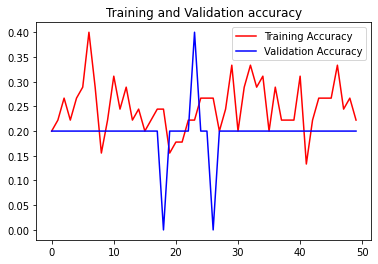

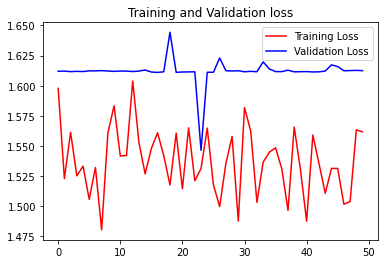

In [ ]:
%matplotlib inline
import matplotlib.image as mping
import matplotlib.pyplot as plt

scores_train = model.evaluate(train_generator,verbose=1)
scores_validation = model.evaluate(val_generator,verbose=1)
print("Train Accuracy: %.2f%%" % (scores_train[1]*100))
print("Validation Accuracy: %.2f%%" % (scores_validation[1]*100))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc = 'best')
plt.show()

In [ ]:
model_weight_file='/content/gdrive/My Drive/CNN/Lima Genre 50/Train'
model.save(model_weight_file)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/CNN/Lima Genre 50/Train/assets


In [ ]:
from sklearn.metrics import classification_report
from keras.models import load_model
import math
import pandas as pd

val_size = 5
batch_size = 5

compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / batch_size))
test_steps = compute_steps_per_epoch(val_size)


tl_img_aug_cnn = load_model(model_weight_file)
pred=tl_img_aug_cnn.predict(val_generator,
                            verbose=1,
                            steps=test_steps)

predicted_class_indices=np.argmax(pred,axis=1)
labels = (val_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames=val_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

labels=['classic','pop','jazz','soul','folk']
test_labels = [fn.split('/')[0] for fn in filenames]

cr=classification_report(test_labels, predictions)
class_report=classification_report(test_labels, predictions,
                                   target_names=labels,
                                   output_dict=True)

print(cr)

1/1 [==============================] - 0s 276ms/step
              precision    recall  f1-score   support

     classic       0.00      0.00      0.00         1
        folk       0.00      0.00      0.00         1
        jazz       0.00      0.00      0.00         1
         pop       0.20      1.00      0.33         1
        soul       0.00      0.00      0.00         1

    accuracy                           0.20         5
   macro avg       0.04      0.20      0.07         5
weighted avg       0.04      0.20      0.07         5



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Klasifikasi

Classic


Saving 1.png to 1 (2).png
prediction: folk


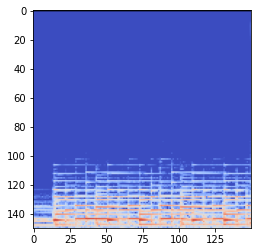

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  class_list = os.listdir(train_dir)

  images = np.vstack([x])
  classes = model.predict(images)
  index = np.argmax(classes[0],axis=0)
  print('prediction:', class_list[index])

Saving 2.png to 2 (1).png
prediction: folk


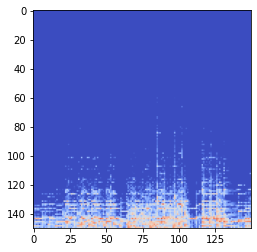

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  class_list = os.listdir(train_dir)

  images = np.vstack([x])
  classes = model.predict(images)
  index = np.argmax(classes[0],axis=0)
  print('prediction:', class_list[index])

Saving 3.png to 3 (1).png
prediction: folk


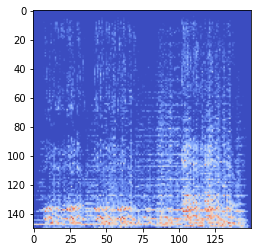

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  class_list = os.listdir(train_dir)

  images = np.vstack([x])
  classes = model.predict(images)
  index = np.argmax(classes[0],axis=0)
  print('prediction:', class_list[index])

Saving 4.png to 4.png
4.png
This image belongs to class folk


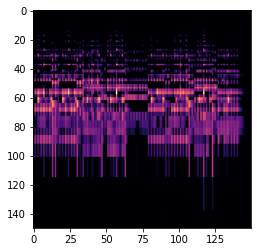

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 5.png to 5.png
5.png
This image belongs to class folk


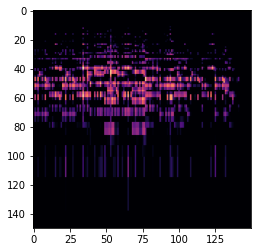

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 6.png to 6.png
6.png
This image belongs to class folk


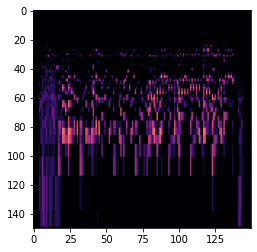

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 7.png to 7.png
7.png
This image belongs to class folk


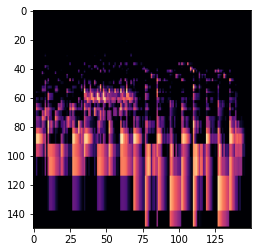

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 10.png to 10.png
10.png
This image belongs to class folk


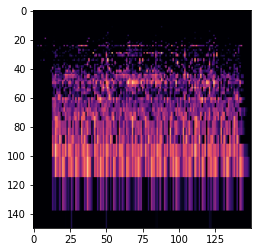

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 9.png to 9.png
9.png
This image belongs to class folk


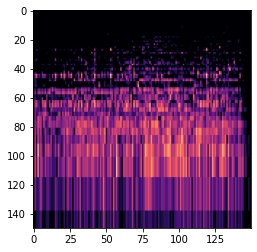

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 8.png to 8 (4).png
8.png


IndexError: ignored

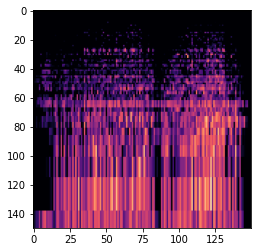

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Pop

Saving 11.png to 11.png
11.png
This image belongs to class classic


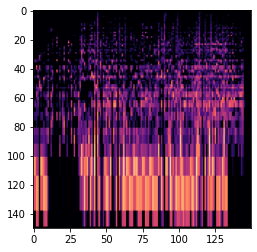

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 12.png to 12.png
12.png
This image belongs to class soul


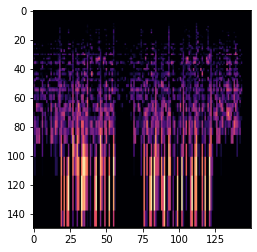

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 13.png to 13.png
13.png
This image belongs to class soul


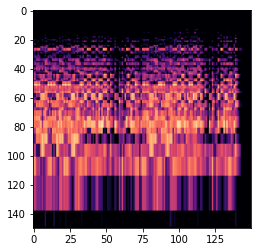

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 14.png to 14.png
14.png
This image belongs to class classic


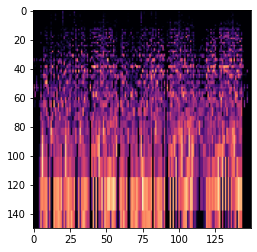

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 15.png to 15.png
15.png
This image belongs to class soul


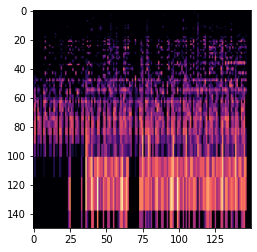

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 16.png to 16.png
16.png
This image belongs to class classic


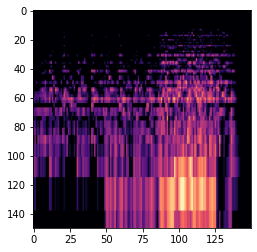

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 17.png to 17.png
17.png
This image belongs to class classic


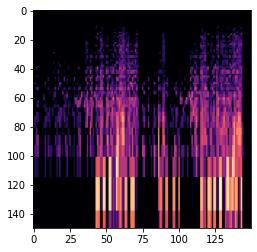

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 18.png to 18.png
18.png
This image belongs to class classic


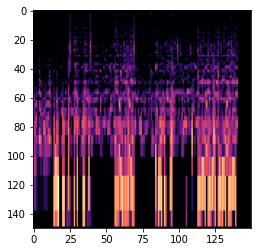

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 19.png to 19.png
19.png
This image belongs to class soul


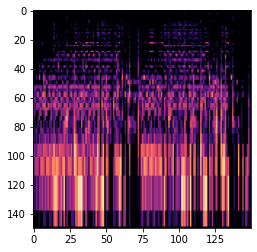

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 20.png to 20.png
20.png
This image belongs to class classic


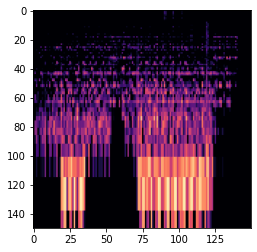

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Jazz

Saving 21.png to 21.png
21.png
This image belongs to class soul


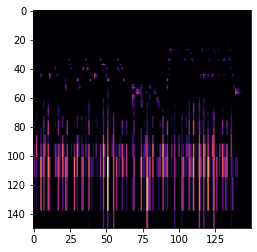

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 22.png to 22.png
22.png
This image belongs to class soul


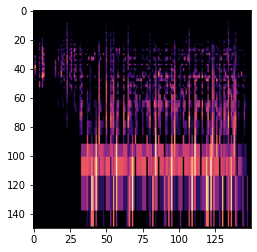

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 23.png to 23.png
23.png
This image belongs to class soul


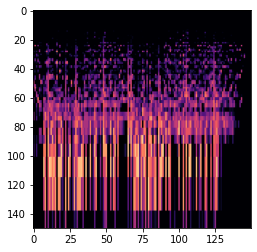

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 24.png to 24.png
24.png
This image belongs to class soul


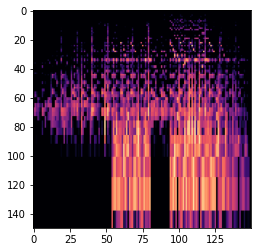

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 25.png to 25.png
25.png
This image belongs to class classic


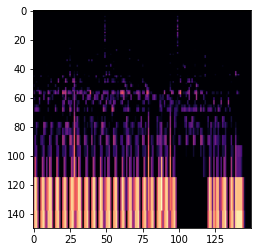

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 26.png to 26.png
26.png
This image belongs to class soul


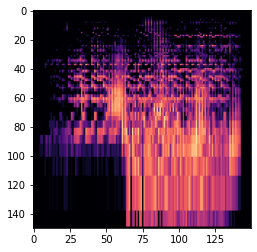

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 27.png to 27.png
27.png
This image belongs to class soul


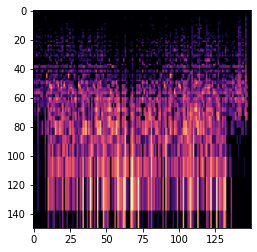

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 28.png to 28.png
28.png
This image belongs to class soul


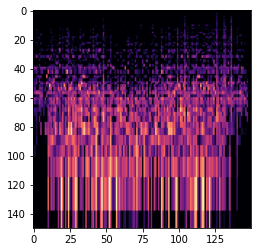

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 29.png to 29.png
29.png
This image belongs to class soul


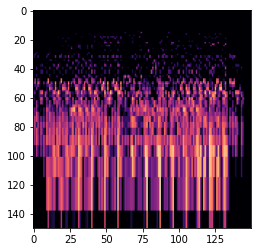

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 30.png to 30.png
30.png
This image belongs to class soul


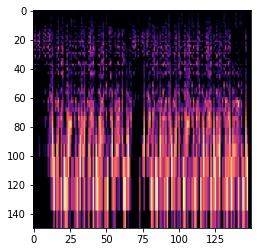

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Soul

Saving 31.png to 31.png
31.png
This image belongs to class soul


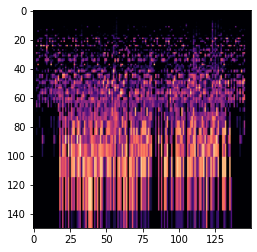

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 32.png to 32.png
32.png
This image belongs to class classic


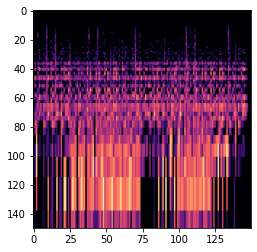

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 33.png to 33.png
33.png
This image belongs to class soul


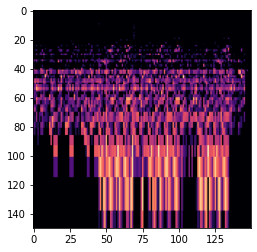

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 34.png to 34.png
34.png
This image belongs to class classic


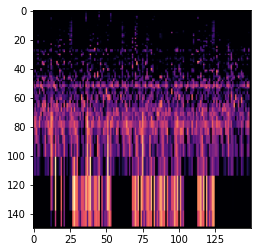

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 35.png to 35.png
35.png
This image belongs to class soul


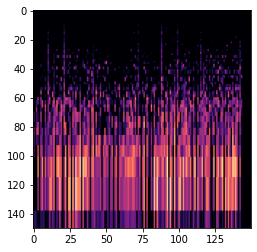

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 36.png to 36.png
36.png
This image belongs to class classic


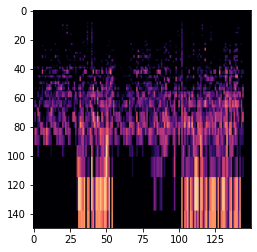

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 37.png to 37.png
37.png
This image belongs to class soul


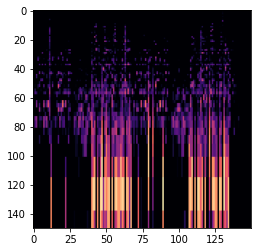

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 38.png to 38.png
38.png
This image belongs to class soul


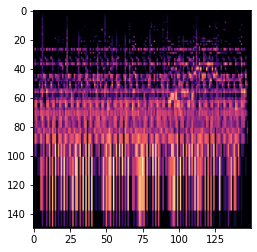

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 39.png to 39.png
39.png
This image belongs to class soul


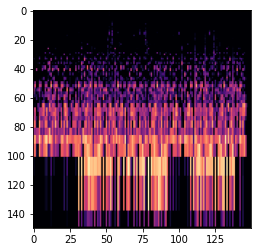

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 40.png to 40.png
40.png
This image belongs to class classic


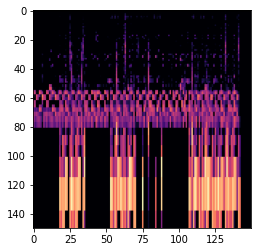

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Folk

Saving 41.png to 41.png
41.png
This image belongs to class soul


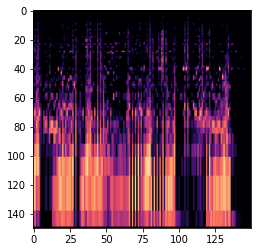

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 42.png to 42.png
42.png
This image belongs to class pop


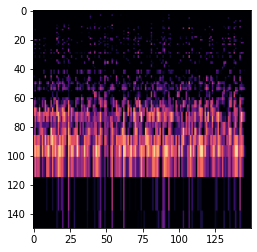

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 43.png to 43.png
43.png
This image belongs to class folk


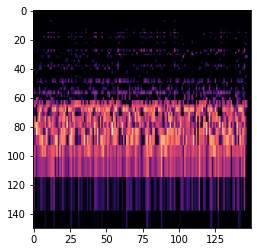

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 44.png to 44.png
44.png
This image belongs to class pop


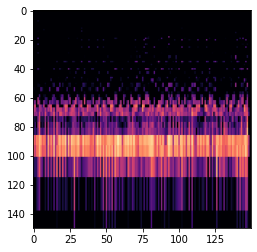

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 45.png to 45.png
45.png
This image belongs to class soul


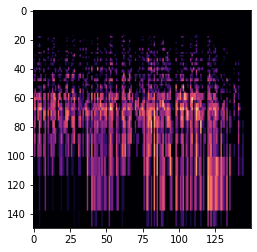

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 46.png to 46.png
46.png
This image belongs to class folk


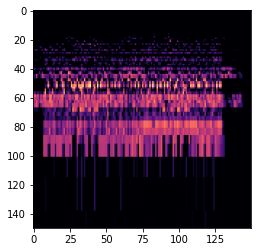

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 47.png to 47.png
47.png
This image belongs to class classic


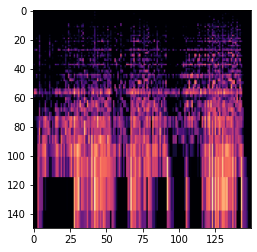

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 48.png to 48.png
48.png
This image belongs to class classic


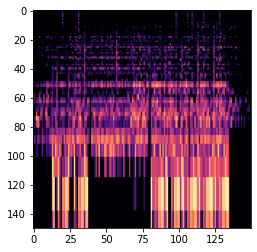

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 49.png to 49.png
49.png
This image belongs to class classic


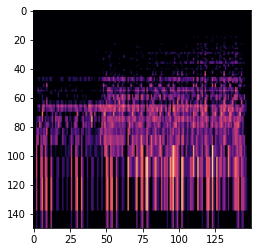

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 50.png to 50.png
50.png
This image belongs to class soul


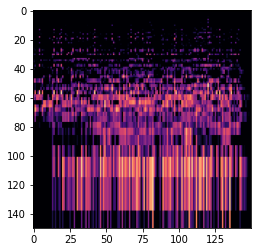

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 5)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break